In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ex1: Implement k-mean algorithm using by numpy

In [26]:
# random initializing K centroid by picking K samples from dataset X
def initialize_random_centroid(K,X):
    m, n = np.shape(X)
    # a centroid should be of shape (1,n), so the centroids array will be shape (K,n)
    centroids = np.empty((K,n))
    for i in range(K):
        # pick a random data point from X as the centroid
        centroids[i] = X[np.random.choice(range(m))]
    return centroids

# Calculates and returns the euclidean distance betwwen two vectors x1 and x2
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum(np.power(x1 - x2, 2)))
    # return np.linalg.norm(x1 - x2)
    
# Finding the closest centroid to a given data point
def closest_centroid(x, centroids, K):
    """Return the index of the closest centroid for a given data point/vector x"""
    distances = np.empty(K)
    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances) # return the index of the lowest distance

# Calculate clusters
def create_clusters(centroids, K, X):
    """Returns an array of cluster indices for all the data samples"""
    m, _ = np.shape(X)
    cluster_idx = np.empty(m)
    for i in range(m):
        cluster_idx[i] = closest_centroid(X[i], centroids, K)
    return cluster_idx

# Complute means
def compute_means(cluster_idx, K, X):
    """Computes and returns the new centroids of the clusters"""
    _, n = np.shape(X)
    centroids = np.empty((K,n))
    for i in range(K):
        points = X[cluster_idx == i] # gather pointsfor the cluster i 
        centroids[i] = np.mean(points, axis = 0) # use axis=0 to compute menas across points
    return centroids

# Put everything together
def run_Kmeans(K,X,max_iterations = 500):
    # initalize random centroids
    centroids = initialize_random_centroid(K,X)
    # loop till max_iterations or convergence
    print(f"initial centroids: {centroids}")
    for _ in range(max_iterations):
        # create clusters by assigning the samples to the closest centroids
        clusters = create_clusters(centroids,K,X)
        previous_centroids = centroids 
        # compute means of the clusters and assign to centroids
        centroids = compute_means(clusters, K, X)
        # if the new_centroids are the same as the old, return clusters
        diff = previous_centroids - centroids
        if not diff.any():
            return clusters, centroids
    return clusters, centroids


In [27]:
# test
from sklearn import datasets
# creating a dataset for clustering
X, y = datasets.make_blobs()
y_preds = run_Kmeans(3, X) # clusters

initial centroids: [[-3.65086971 -6.1719455 ]
 [-3.25826025 -6.6596191 ]
 [-3.67388223  0.37306047]]


In [28]:
y_preds

(array([0., 0., 2., 0., 2., 1., 0., 0., 1., 0., 1., 2., 1., 2., 0., 0., 1.,
        1., 1., 0., 2., 0., 1., 1., 1., 1., 0., 1., 0., 2., 2., 2., 1., 0.,
        1., 0., 0., 2., 2., 2., 0., 0., 0., 0., 2., 1., 2., 2., 2., 0., 2.,
        1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 0., 2., 0., 0.,
        0., 1., 2., 1., 2., 0., 0., 2., 1., 1., 2., 2., 0., 0., 2., 2., 0.,
        1., 1., 0., 2., 0., 1., 2., 1., 0., 2., 1., 0., 2., 1., 1.]),
 array([[-2.92360633,  0.58656753],
        [-2.78495813, -6.23554258],
        [ 1.12065561,  5.75732249]]))

In [29]:
#X

In [30]:
X.shape

(100, 2)

In [31]:
y_preds

(array([0., 0., 2., 0., 2., 1., 0., 0., 1., 0., 1., 2., 1., 2., 0., 0., 1.,
        1., 1., 0., 2., 0., 1., 1., 1., 1., 0., 1., 0., 2., 2., 2., 1., 0.,
        1., 0., 0., 2., 2., 2., 0., 0., 0., 0., 2., 1., 2., 2., 2., 0., 2.,
        1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 0., 2., 0., 0.,
        0., 1., 2., 1., 2., 0., 0., 2., 1., 1., 2., 2., 0., 0., 2., 2., 0.,
        1., 1., 0., 2., 0., 1., 2., 1., 0., 2., 1., 0., 2., 1., 1.]),
 array([[-2.92360633,  0.58656753],
        [-2.78495813, -6.23554258],
        [ 1.12065561,  5.75732249]]))

In [32]:
y_preds[1].shape #new_centroids

(3, 2)

In [33]:
y 

array([1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1,
       2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0,
       1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2])

In [34]:
y.shape

(100,)

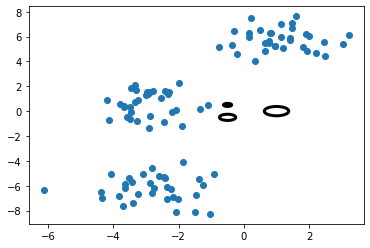

In [35]:
plt.scatter(X[:, 0], X[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

In [36]:
initialize_random_centroid(3,X)

array([[-2.76320656, -6.1549872 ],
       [-1.05043666, -8.27073928],
       [-2.24575582, -6.2712271 ]])

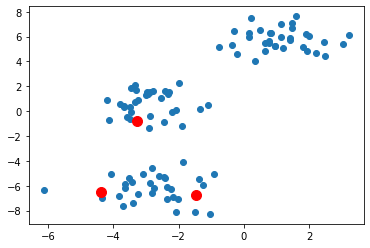

In [37]:
plt.scatter(X[:, 0],X[:,1])
centroids = initialize_random_centroid(3,X)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [38]:
y_preds[1]
arr = np.asarray(y_preds[1])
arr

array([[-2.92360633,  0.58656753],
       [-2.78495813, -6.23554258],
       [ 1.12065561,  5.75732249]])

Text(0.5, 1.0, 'K-means clustering')

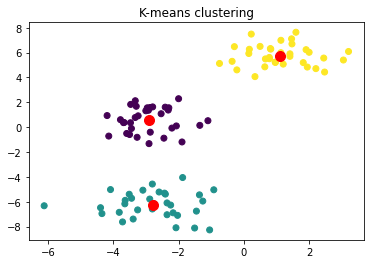

In [39]:
plt.scatter(X[:, 0], X[:, 1], c=y_preds[0])
plt.scatter(arr[:, 0], arr[:, 1], c='r', s=100)
plt.title('K-means clustering')


In [40]:
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.title('actual clustering')

# Ex2: Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply kmean algorithm built in the first question? Try different number of cluster to see how the result change?

In [41]:
X, y = datasets.make_blobs()
y_preds = run_Kmeans(2, X) # clusters

initial centroids: [[-0.83674097  7.93679832]
 [-2.18391108 -2.87330166]]


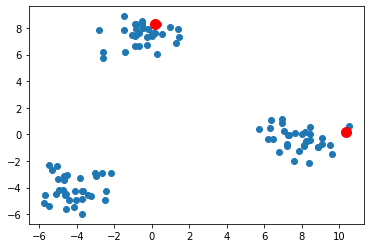

In [42]:
plt.scatter(X[:, 0],X[:,1])
centroids = initialize_random_centroid(2,X)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [43]:
y_preds[1]
arr = np.asarray(y_preds[1])
arr

array([[-0.49414516,  7.53583145],
       [ 1.95670451, -2.19206605]])

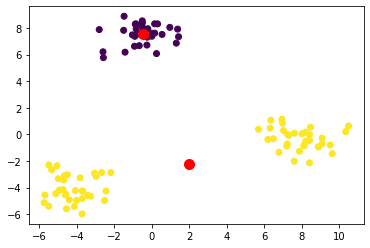

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y_preds[0])
plt.scatter(arr[:, 0], arr[:, 1], c='r', s=100)


initial centroids: [[-4.73542741 -4.15042442]
 [-4.73542741 -4.15042442]]


/Users/samnguyen/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/samnguyen/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


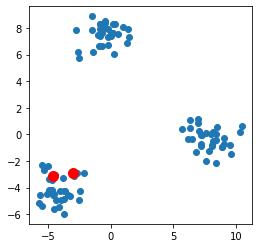

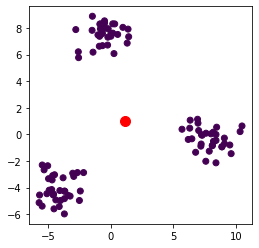

In [45]:
# 2 clusters


y_preds = run_Kmeans(2, X) # clusters

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:, 0],X[:,1])
centroids = initialize_random_centroid(2,X)
ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

y_preds[1]
arr = np.asarray(y_preds[1])
arr

fig, ax1 = plt.subplots(figsize=(4,4))
ax1.scatter(X[:, 0], X[:, 1], c=y_preds[0])
ax1.scatter(arr[:, 0], arr[:, 1], c='r', s=100)

initial centroids: [[-0.45706834  7.98369949]
 [ 0.14888061  8.31875217]
 [-2.80699507  7.88453663]
 [ 8.18821746  0.16807663]]


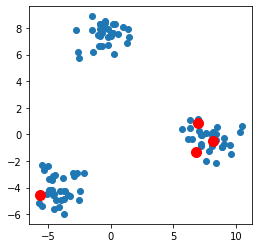

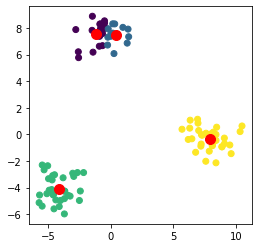

In [46]:
# 4 clusters


y_preds = run_Kmeans(4, X) # clusters

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:, 0],X[:,1])
centroids = initialize_random_centroid(4,X)
ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

y_preds[1]
arr = np.asarray(y_preds[1])
arr

fig, ax1 = plt.subplots(figsize=(4,4))
ax1.scatter(X[:, 0], X[:, 1], c=y_preds[0])
ax1.scatter(arr[:, 0], arr[:, 1], c='r', s=100)



initial centroids: [[-2.18391108 -2.87330166]
 [ 8.40682901 -0.00866388]
 [-5.49107395 -2.30367495]
 [ 8.11779681 -0.84757075]
 [ 1.42199698  7.34692308]]


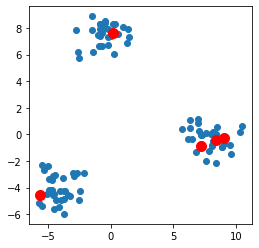

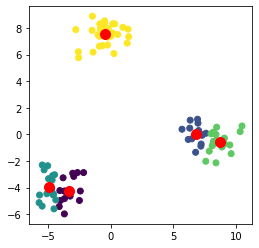

In [47]:
# 5 clusters


y_preds = run_Kmeans(5, X) # clusters

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[:, 0],X[:,1])
centroids = initialize_random_centroid(5,X)
ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

y_preds[1]
arr = np.asarray(y_preds[1])
arr

fig, ax1 = plt.subplots(figsize=(4,4))
ax1.scatter(X[:, 0], X[:, 1], c=y_preds[0])
ax1.scatter(arr[:, 0], arr[:, 1], c='r', s=100)



### Comment: as we increase the number of clusters K


##### Within variability
    As the value of k increases, the within-cluster sum of square value will decrease. (within variability measures the distance between each point and the center of the cluster to which that point belongs.)
    Consider two clusters. We will have two centroids, and given how k-means work, each point is assigned to the cluster whose centroid is closer. So by adding an extra cluster, we reduce the within variability that we had before.
    The more clusters you add, the easier is for the algorithm to reduce the distance between points and centroids, reducing the within variability.
    
##### Between variability

    the between variability measures the distance between the center of your dataset and each centroid.

    If you only have one cluster, the centroid of that cluster is precisely the center of your data, so the between variability is 0

    If you have two clusters, you will have two centroids that will no longer coincide with the center of your data, so your between variability will be a value larger than 0

    The more clusters you have, the more centroids you have, and likely the larger your between variability will be.

# EX3: Read and understand how to choose k (https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/), draw the elbow for the above dataset.

In [48]:
# K = The number of clusters you want to group your data points into, has to be predefined
# The ELBOW method runs k-means clustering (kmeans number of clusters) on the dataset for a range of value of k (say 1 to 10)
## Perform Kmeans clustering will all these different values of k. For each of the k values, we calculate average distances to the centroid across all data points
## Plot these points and find the point where the average distance from the centroid falls suddenly ("ELBOW")

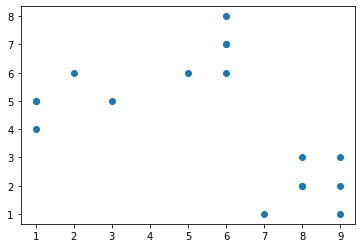

In [54]:
from sklearn.metrics import silhouette_score
X1 = [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]
X2 = [5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]
plt.scatter(X1,X2)
plt.show()

In [55]:
data_frame = pd.DataFrame(X1, X2)

/var/folders/b0/n1lz5zk51z374mpb3hyxn5n00000gp/T/ipykernel_1763/1252250508.py:6: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(data_frame)


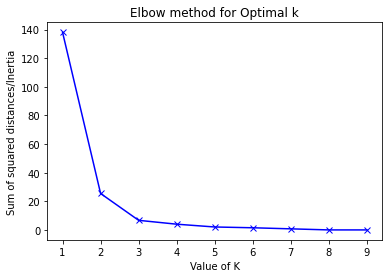

In [56]:
from sklearn.cluster import KMeans
sum_squared_distances = []
K = range(1,10)
for num_clusters in K:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(data_frame)
    sum_squared_distances.append(kmeans.inertia_)
plt.plot(K, sum_squared_distances, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title ('Elbow method for Optimal k')
plt.show()
# at elbow, k = 3

#### why in this method, we choose k at elbow? 
##### average distances to the centroid across all the data points from 1-2 is bigger and follow dramatically decreased trend
##### seeing a slightly decrease  from 2-3
##### and remaining stable, from 3 - 10

# EX4: Read the limitation of kmean (https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages), find at least three example k-mean doesn't work.

1. Irregularly shaped clusters. 
2. Clustering data of varying sizes and density. {k-means has trouble clustering data where clusters are of varying sizes and density. You need to choose "k" carefully}
3. Scaling with number of dimensions. {As the number of dimensions increases, a distance-based similarity measure converges to a constant value between any given examples. We should use support tool to reduce dimensionality by e.x PCA on feature data, or by using "spectral clustering" for easier k-means clustering}